In [1]:
import torch

### 数据操作

#### 入门

In [2]:
x = torch.arange(12) #创建行向量
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape #输出x的形状

torch.Size([12])

In [4]:
x.size()  #行向量的shape和size一样

torch.Size([12])

In [5]:
x.numel() #返回数组中元素的个数

12

In [6]:
X = x.reshape(3,4) #改变形状，但是元素值一样
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
x.reshape(-1,4),x.reshape(3,-1),x.reshape(3,4)  #-1表示通过计算获得行数或者列数

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [8]:
torch.zeros((2,3,4)) #全0矩阵，矩阵维度用元组传入

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [9]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [10]:
torch.randn(3,4) #均值为0,标准差为1的正太分布随机

tensor([[-0.6072, -0.2022,  0.7165,  1.4284],
        [-0.2345,  1.0171, -0.8282, -0.3758],
        [-0.0668, -0.0878, -0.2535,  0.6648]])

In [11]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])  
#通过列表创建tensor

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
[[2,1,4,3],[1,2,3,4],[4,3,2,1]]

[[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]

#### 运算符

In [13]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y,x - y,x * y, x / y, x ** y 

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [14]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [15]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])

In [16]:
torch.cat((X,Y),dim=0) #扩展行

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [17]:
torch.cat((X,Y),dim=1) #扩展列

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [18]:
X == Y #按元素判断

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [20]:
X.sum()  #所有元素求和

tensor(66.)

#### 广播机制

1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状。
2. 对生成的数组执行按元素操作

In [21]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [22]:
a + b #广播机制

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [23]:
a = torch.ones(3,1,2)
b = torch.ones(2,1)
#广播时，从尾部遍历维度，1对应2,2对应1,3对应不存在
(a+b).size()

torch.Size([3, 2, 2])

#### 索引和切片

In [24]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [25]:
X[-1] #最后一个元素


tensor([ 8.,  9., 10., 11.])

In [26]:
X[1:3] #第二个元素和第三个元素

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
X[1,2] = 9 #写入操作
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [28]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

#### 节省内存

In [29]:
before = id(Y)
Y = X + Y
id(Y) == before

False

In [30]:
Z = torch.zeros_like(Y) #安装Y的形状创建全0矩阵
print('id(Z):',id(Z))
Z[:] = X + Y
print('id(Z):',id(Z))

id(Z): 140389965656688
id(Z): 140389965656688


In [31]:
before = id(X)
X += Y
id(X) == before


True

In [32]:
before = id(X)
X = X + Y  #注意和前一个操作对比，此操作会使用新内存，钱一个不会
id(X) == before

False

#### 转换为其他Python对象

In [33]:
A = X.numpy()  #tensor转为numpy
B = torch.tensor(A) #numpy转为tensor
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [34]:
a = torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 数据预处理

介绍pandas预处理原始数据，并且转为tensor

#### 读取数据集

In [35]:
import os

os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')

with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n') #列名
    f.write('NA,Pave,127500\n') #每行表示一个样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [36]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


#### 处理缺失值

In [37]:
from unicodedata import numeric


inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]  #前两列为输入，最后一列为u输出
inputs = inputs.fillna(inputs.mean())  #填充NaN，使用均值
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [38]:
inputs = pd.get_dummies(inputs,dummy_na=True) #是利用pandas实现one hot encode的方式
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


#### 转换为张量格式

In [39]:
X,y = torch.tensor(inputs.values),torch.tensor(outputs.values)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [40]:
inputs.values,outputs.values

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]]),
 array([127500, 106000, 178100, 140000]))

### 转换为张量格式

#### 表量

In [41]:
import torch

In [42]:
x = torch.tensor(3.)
y = torch.tensor(2.)
x + y, x* y, x / y , x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#### 向量

In [43]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [44]:
x[3] #第三个元素

tensor(3)

In [45]:
len(x) #计算长度

4

In [46]:
x.shape  #形状  向量或轴的维度用来表示向量或轴的长度，即向量或轴的元素数量。张量的维度用来表示张量具有的轴数

torch.Size([4])

#### 矩阵

In [47]:
A = torch.arange(20).reshape(5,4) #创建20个数字的向量，修改成（5,4）的矩阵;reshape（）函数传入的不是元组
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [48]:
A.T #A的转置  a_ij = b_ji

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [49]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])  #对角矩阵
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [50]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

#### 张量

In [51]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

#### 张量的基本性质

In [52]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()  #通过分配新的内存，将A的副分分给B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [53]:
A * B #Hadamad product

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [54]:
a = 2
X = torch.arange(24).reshape(2,3,4)
print(a + X),#按元素相加
(a * X).shape

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])


torch.Size([2, 3, 4])

#### 降维

In [55]:
x = torch.arange(4,dtype=torch.float32)
x,x.sum() #所有元素求和

(tensor([0., 1., 2., 3.]), tensor(6.))

In [56]:
A.shape,A.sum()  #矩阵元素和

(torch.Size([5, 4]), tensor(190.))

In [57]:
A_sum_axis0 = A.sum(axis=0) #axis=0表示在行上进行扩展或缩减
A_sum_axis0,A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [58]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1,A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [59]:
A.sum(axis=[0,1]) # A.sum()

tensor(190.)

In [60]:
A.sum(axis=(0,1))  #和上相同

tensor(190.)

In [61]:
A.mean(),A.sum()/A.numel()  #和/个数

(tensor(9.5000), tensor(9.5000))

In [62]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

#### 非降维求和

In [63]:
sum_A = A.sum(axis=1,keepdim= True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [64]:
A/sum_A #sum_A还是两个轴，通过广播进行相处


tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [65]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [66]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

#### 点积

In [67]:
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [68]:
torch.sum(x * y)

tensor(6.)

In [69]:
(x * y).sum()

tensor(6.)

#### 矩阵-向量积

In [70]:
A.shape,x.shape,torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

#### 矩阵-矩阵乘法

In [71]:
B = torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

#### 范数

向量范数是将向量映射到标量的函数f。给定任意向量X，向量范数要满足一些属性。
1. 如果我们按常数因子alph缩放向量的所有元素，其范数也会按相同的常数因子的绝对值缩放。
2. 满足三角不等式。
3. 范数是非负的。

In [72]:
u = torch.tensor([3.,-4.]) # 2范数
torch.norm(u)

tensor(5.)

In [73]:
torch.abs(u).sum()  # 1范数

tensor(7.)

In [74]:
torch.norm(torch.ones((4,9)))  # F范数  矩阵元素平方和的平方跟

tensor(6.)

### 微积分

In [75]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x**2 -4 * x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h = 0.1

for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h *= 0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [76]:
def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘画"""
    backend_inline.set_matplotlib_formats('svg')

In [77]:
def set_figsize(figsize=(3.5,2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [78]:
#@save
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [90]:
#@save
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',
        fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
        """绘制数据点"""
        if legend is None:
            legend = []
        
        set_figsize(figsize)
        axes = axes if axes else d2l.plt.gca()

        #如果X有一个轴，输出True
        def has_one_axis(X):
            return (hasattr(X,"ndim") and X.ndim == 1 or isinstance(X,list) and not hasattr(X[0],"__len__"))

        if has_one_axis(X):
            X = [X]

        if Y is None:
            X,Y = [[]] * len(X),X
        elif has_one_axis(Y):
            Y = [Y]
        if len(X) != len(Y):
            X = X * len(Y)
        axes.cla()
        for x,y,fmt in zip(X,Y,fmts):
            if len(x):
                axes.plot(x,y,fmt)
            else:
                axes.plot(y,fmt)
        set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)


KeyboardInterrupt: 

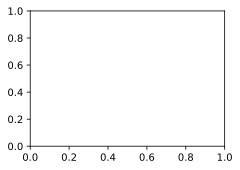

In [95]:
x = np.arange(0,3,0.1)
plot(x,[f(x),2 * x -3],'x','f(x)',legend=['f(x)','Tangent line (x = 1)'])

#### 练习

KeyboardInterrupt: 

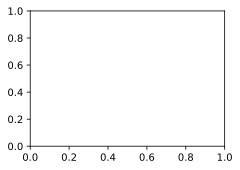

In [94]:
x = np.arange(-2,2,0.1)
y = lambda x:x**3 - x **(-1)
plot(x,None,'x',f(x),legend=['f(x)','Tangent line(x = 1'])
[f(x),x**3-x**(-1)]

In [82]:
x = np.arange(0,1,0.1)
x,[f(x),x*2]

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
         -1.17]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])])